The dataset used in this notebook is included in the folder of the project.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
customers_data = pd.read_csv("Mall_Customers.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Mall_Customers.csv'

In [ ]:
customers_data

In [ ]:
customers_data = customers_data.drop('CustomerID', axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [3]:
encode = LabelEncoder()
encoded_sex = encode.fit_transform(customers_data.iloc[:, 0])
print(encoded_sex)

NameError: name 'LabelEncoder' is not defined

In [4]:
customers_data['Genre'] = encoded_sex

NameError: name 'encoded_sex' is not defined

In [44]:
customers_data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [45]:
customers_data.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca_reducer = PCA(n_components=2)
reduced_data = pca_reducer.fit_transform(customers_data)
reduced_data

array([[-3.18699448e+01, -3.30012521e+01],
       [ 7.64494048e-01, -5.68429006e+01],
       [-5.74082757e+01, -1.31249607e+01],
       [-2.16854252e+00, -5.34785900e+01],
       [-3.21740846e+01, -3.03884119e+01],
       [-2.17695183e+00, -5.22272685e+01],
       [-5.90656895e+01, -9.54376302e+00],
       [ 1.23708622e+01, -6.16180208e+01],
       [-6.63157690e+01, -3.21423160e+00],
       [-5.65556212e+00, -4.72672225e+01],
       [-5.82365979e+01, -9.13418751e+00],
       [ 1.46218043e+01, -6.21075685e+01],
       [-5.51608374e+01, -1.00799251e+01],
       [-3.02878330e-03, -5.01140754e+01],
       [-5.27646657e+01, -1.16807468e+01],
       [ 1.94661180e+00, -5.15222086e+01],
       [-3.45055496e+01, -2.37615402e+01],
       [-7.30493262e+00, -4.35151138e+01],
       [-4.12573070e+01, -1.64734737e+01],
       [ 1.61902860e+01, -5.83001207e+01],
       [-3.27400141e+01, -2.13347966e+01],
       [-9.81885245e-01, -4.44524038e+01],
       [-5.78100898e+01, -1.87057486e+00],
       [-1.

In [48]:
reduced_data.shape

(200, 2)

In [49]:
from sklearn.cluster import KMeans

In [50]:
km = KMeans(n_clusters=5)

In [51]:
cluster = km.fit(reduced_data)

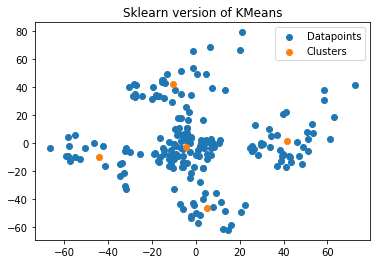

In [52]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], label='Datapoints')
plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], label='Clusters')
plt.title("Sklearn version of KMeans")
plt.legend()
plt.show()

In [56]:
from kmeans_numpy_improved import *

In [61]:
km_numpy = KMeans_numpy(n_clusters=5, tolerance=0.0001)

In [62]:
clusters, clusterd_data = km_numpy.fit(reduced_data)
clusters = np.array(clusters)

In [64]:
cluster_one_data = np.array(clusterd_data[0])
cluster_two_data = np.array(clusterd_data[1])
cluster_three_data = np.array(clusterd_data[2])
cluster_four_data = np.array(clusterd_data[3])
cluster_five_data = np.array(clusterd_data[4])

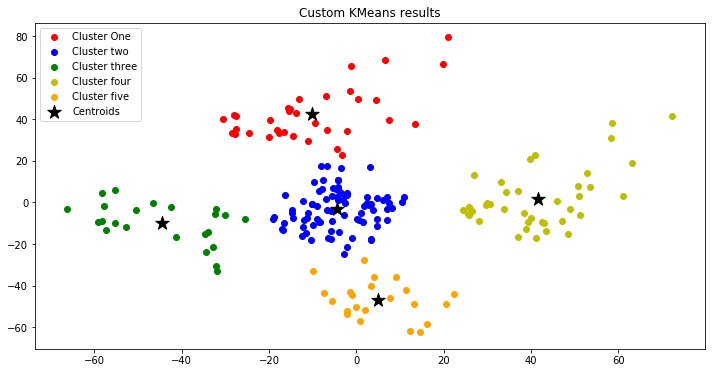

In [65]:
plt.figure(figsize=(12, 6))
plt.scatter(cluster_one_data[:, 0], cluster_one_data[:, 1], c='r', label='Cluster One')
plt.scatter(cluster_two_data[:, 0], cluster_two_data[:, 1], c='b', label='Cluster two')
plt.scatter(cluster_three_data[:, 0], cluster_three_data[:, 1], c='g', label='Cluster three')
plt.scatter(cluster_four_data[:, 0], cluster_four_data[:, 1], c='y', label='Cluster four')
plt.scatter(cluster_five_data[:, 0], cluster_five_data[:, 1], color='orange', label='Cluster five')
plt.scatter(clusters[:, 0], clusters[:, 1], marker='*', s=200, color='black', label='Centroids')
plt.title("Custom KMeans results")
plt.legend()
plt.show()

### Mean Shift

In [58]:
from sklearn.cluster import MeanShift

In [59]:
mshift = MeanShift(bandwidth=25)

In [60]:
cluster_mean = mshift.fit(reduced_data)

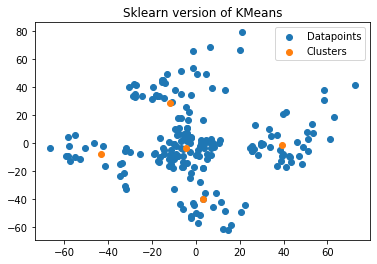

In [61]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], label='Datapoints')
plt.scatter(cluster_mean.cluster_centers_[:, 0], cluster_mean.cluster_centers_[:, 1], label='Clusters')
plt.title("Sklearn version of KMeans")
plt.legend()
plt.show()

## Analyse clusters

In [66]:
full_data_kmeans = KMeans_numpy(n_clusters=5)
centroids, clus_data = full_data_kmeans.fit(customers_data.values)

/Users/guru/code/Learning_and_Development/Artificial_Intelligence_and_Machine_Learning/machine_learning_algorithms_using_frameworks/code/clustering/kmeans_numpy_improved.py:61: RuntimeWarning: divide by zero encountered in true_divide
  if np.sum((current_centroid - original_centroid)/original_centroid*100.0) > self.tol:


Let's creat table for each centroid so we can easly visualise data in clusters

In [68]:
cluster_1 = pd.DataFrame(clus_data[0], columns=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
cluster_2 = pd.DataFrame(clus_data[1], columns=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
cluster_3 = pd.DataFrame(clus_data[2], columns=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
cluster_4 = pd.DataFrame(clus_data[3], columns=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
cluster_5 = pd.DataFrame(clus_data[4], columns=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

### Cluster ONE data

In [69]:
cluster_1

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,0,20,16,6
2,0,31,17,40
3,0,35,18,6
4,1,64,19,3
5,1,67,19,14
6,0,58,20,15
7,1,37,20,13
8,0,35,21,35
9,1,52,23,29


In [64]:
print("Average age for customers in cluster one: {}".format(np.array(cluster_1['Age']).mean()))
print("Average annual income (in thousends) for customers in cluster one: {}".format(np.array(cluster_1['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousends) for customers in cluster one: {}".format(np.array(cluster_1['Annual Income (k$)']).std()))
print("In cluster one we have: {} customers".format(cluster_1.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_1.loc[(cluster_1['Genre'] == 1.0)].shape[0], cluster_1.loc[(cluster_1['Genre'] == 0.0)].shape[0]))

Average age for customers in cluster one: 52.05797101449275
Average annual income (in thousends) for customers in cluster one: 46.42028985507246
Deviation of the mean for annual income (in thousends) for customers in cluster one: 14.825952370222293
In cluster one we have: 69 customers
From those customers we have 28 male and 41 female


### Cluster TWO Customers analysis

In [70]:
cluster_2

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,28,77,97
1,1,34,78,90
2,1,39,78,88
3,0,38,78,76
4,0,27,78,89
5,0,30,78,78
6,0,29,79,83
7,0,31,81,93
8,0,36,85,75
9,0,33,86,95


In [31]:
print("Average age for customers in cluster two: {}".format(np.array(cluster_2['Age']).mean()))
print("Average annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_2['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_2['Annual Income (k$)']).std()))
print("In cluster one we have: {} customers".format(cluster_2.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_2.loc[(cluster_2['Genre'] == 1.0)].shape[0], cluster_2.loc[(cluster_2['Genre'] == 0.0)].shape[0]))

Average age for customers in cluster two: 45.21739130434783
Average annual income (in thousands) for customers in cluster one: 26.304347826086957
Deviation of the mean for annual income (in thousands) for customers in cluster one: 7.720299513274676
In cluster one we have: 23 customers
From those customers we have 9 male and 14 female


### Cluster THREE Customers analysis

In [71]:
cluster_3

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,23,70,29
1,1,43,71,35
2,1,59,71,11
3,1,47,71,9
4,0,25,72,34
5,1,20,73,5
6,0,44,73,7
7,1,19,74,10
8,0,57,75,5
9,0,28,76,40


In [72]:
print("Average age for customers in cluster three: {}".format(np.array(cluster_3['Age']).mean()))
print("Average annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_3['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_3['Annual Income (k$)']).std()))
print("In cluster one we have: {} customers".format(cluster_3.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_3.loc[(cluster_3['Genre'] == 1.0)].shape[0], cluster_3.loc[(cluster_3['Genre'] == 0.0)].shape[0]))

Average age for customers in cluster three: 40.39473684210526
Average annual income (in thousands) for customers in cluster one: 87.0
Deviation of the mean for annual income (in thousands) for customers in cluster one: 16.055823668819066
In cluster one we have: 38 customers
From those customers we have 20 male and 18 female


### Cluster FOUR Customers analysis

In [73]:
cluster_4

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,21,15,81
1,0,23,16,77
2,0,22,17,76
3,0,23,18,94
4,0,30,19,72
5,0,35,19,99
6,0,24,20,77
7,1,22,20,79
8,1,20,21,66
9,0,35,23,98


In [35]:
print("Average age for customers in cluster four: {}".format(np.array(cluster_4['Age']).mean()))
print("Average annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_4['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_4['Annual Income (k$)']).std()))
print("In cluster one we have: {} customers".format(cluster_4.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_4.loc[(cluster_4['Genre'] == 1.0)].shape[0], cluster_4.loc[(cluster_4['Genre'] == 0.0)].shape[0]))

Average age for customers in cluster four: 32.69230769230769
Average annual income (in thousands) for customers in cluster one: 86.53846153846153
Deviation of the mean for annual income (in thousands) for customers in cluster one: 16.10199247719673
In cluster one we have: 39 customers
From those customers we have 18 male and 21 female


### Cluster FIVE Customers analysis

In [36]:
cluster_5

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,21,15,81
1,0,23,16,77
2,0,22,17,76
3,0,23,18,94
4,0,30,19,72
5,0,35,19,99
6,0,24,20,77
7,1,22,20,79
8,1,20,21,66
9,0,35,23,98


In [75]:
print("Average age for customers in cluster five: {}".format(np.array(cluster_5['Age']).mean()))
print("Average annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_5['Annual Income (k$)']).mean()))
print("Deviation of the mean for annual income (in thousands) for customers in cluster one: {}".format(np.array(cluster_5['Annual Income (k$)']).std()))
print("In cluster one we have: {} customers".format(cluster_5.shape[0]))
print("From those customers we have {} male and {} female".format(cluster_5.loc[(cluster_5['Genre'] == 1.0)].shape[0], cluster_5.loc[(cluster_5['Genre'] == 0.0)].shape[0]))

Average age for customers in cluster five: 44.89473684210526
Average annual income (in thousands) for customers in cluster one: 48.705263157894734
Deviation of the mean for annual income (in thousands) for customers in cluster one: 14.446178649121258
In cluster one we have: 95 customers
From those customers we have 36 male and 59 female


### Conclusion:

Based on the data from clusters we can see that there are 3 clusters with totally different age of customers. Also it is more usual for older people to have bigger sallary which is as well shown in our results.

As we can see in the cluster 2, people around age 40 have the biggest salary. Based on that the most exclusive items should be directly promoted to people in that age. Younger people, around the age of 25, tend to have lower salaries, but as we can see from Cluster 5 there are people around age 28 whose salary is much bigger (almost double). 

Gender to target in this mall is of course: Females. They tend to buy more stuff, so promotions should be directed to them.


## Business side of Customer clustering

So the real question is how can we use this in our business? Based on the information from the clusters we can decide which strategy to run, what our target should be. There is also a posibility  to conduct an survay on the potential new strategy for one or two segments of customers. Based on that feedback we can decide whether the new strategy is good for that customer segment or not, even before the strategy is released.